In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

%matplotlib inline

In [2]:
classes = pd.read_json('MSASL_classes.json')
synonym = pd.read_json('MSASL_synonym.json')
train = pd.read_json('MSASL_train.json')
test = pd.read_json('MSASL_test.json')
val = pd.read_json('MSASL_val.json')

In [5]:
train.head()

org_text     clean_text  start_time  signer_id  signer  start  \
0  match [light-a-MATCH]          match         0.0          0       0      0   
1                   FAIL           fail         0.0          0      -1      0   
2                  laugh          laugh         0.0          4      26      0   
3                   BOOK           book         0.0          0      -1      0   
4          sign-language  sign language         0.0          0      -1      0   

   end                          file  label  height    fps  end_time  \
0   83           match light-a-MATCH    830     360  30.00     2.767   
1   74                          FAIL    542     360  25.00     2.960   
2   31  SignSchool Laugh with Legs 2    312     360  29.97     1.034   
3   66                       BOOK(3)     38     360  25.00     2.640   
4   75        SIGN-LANGUAGE-S-CLAW-F    848     360  29.97     2.502   

                                           url           text  \
0  https://www.youtube.com/watch?v=C37R_Ix8-qs          match   
1  https://www.youtube.com/watch?v=PIsUJl8BN_I           fail   
2          www.youtube.com/watch?v=9FdHlMOnVjg          laugh   
3  https://www.youtube.com/watch?v=J7tP98oDxqE           book   
4          www.youtube.com/watch?v=N2mG9ZKjrGA  sign language   

                                                 box  width  review  
0  [0.057544618844985004, 0.21637457609176602, 1....    640     NaN  
1  [0.06577941775321901, 0.167171776294708, 0.939...    480     NaN  
2  [0.131885945796966, 0.32334136962890603, 1.0, ...    640     NaN  
3  [0.055698871612548, 0.25173279643058705, 0.996...    480     NaN  
4  [0.039043992757797005, 0.24198183417320202, 1....    640     NaN

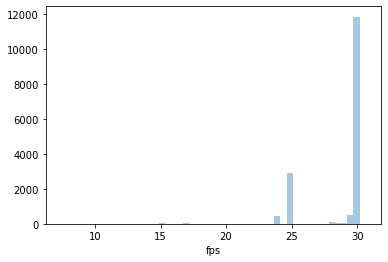

In [6]:
sns.distplot(train.fps, kde=False)

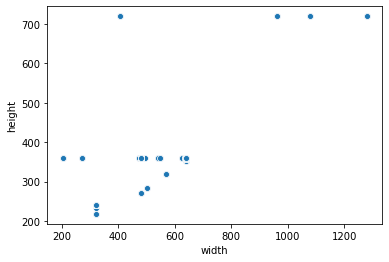

In [7]:
# plt.figure(figsize=(2,2))
sns.scatterplot(train.width, train.height)

In [8]:
train['avg_length'] = train.end_time - train.start_time

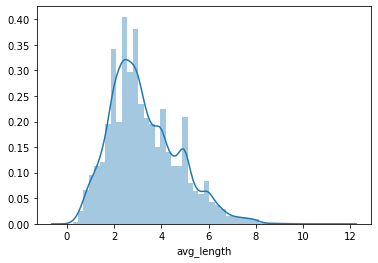

In [9]:
sns.distplot(train.avg_length)

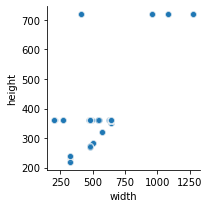

In [67]:
sns.relplot(x="width", y="height", sizes=(40, 400), alpha=.5, palette="muted",
            height=3, data=train)

In [24]:
label_count = train.groupby('text').count().reset_index()

count_ = label_count[['text','label']].sort_values('label', ascending=False)[:50]
chart = sns.countplot(x='text',y='label',data=count)
plt.set_xlabels(chart.get_xticklabels(), rotation=45)


TypeError: Cannot pass values for both `x` and `y`